# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps:

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

In [40]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.stats import linregress
from pprint import pprint
import requests
import time
from datetime import date


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#print (cities)




# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
#set up query url
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

In [29]:
# set up lists to hold reponse info (data)
lat = []
temp = []
cloudiness =[]
country = []
date = []
humidity = []
lon = []
max_temp = []
wind_speed = []

final_cities = []

# Loop through the list of cities and perform a request for weather & city data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        final_cities.append(city)
        print (city)
    except KeyError:
              
        print(city + ' not found')
      
    
#wind_speed
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

barrow
butaritari
ushuaia
ponta do sol
rikitea
vallenar
busselton
new norfolk
alice springs
paamiut
ekhabi
vaini
prince rupert
mahebourg
lagoa
lingao
georgetown
jamestown
korla
nouadhibou
danielskuil
ayan
bethel
carnarvon
ngukurr not found
fort nelson
the pas
bluff
kaitangata
mar del plata
bilibino
kodiak
husavik
barreirinhas
ejura
albany
nizhneyansk not found
leningradskiy
kita
kathu
tromso
chapais
san jose
manavalakurichi
dikson
kahului
yar-sale
nuuk
avarua
louisbourg not found
touros
mount isa
pontes e lacerda
springdale
northport
illoqqortoormiut not found
vila velha
tuktoyaktuk
diego de almagro
yumen
cape town
khonuu not found
constitucion
inirida
grand gaube
marcona not found
puerto ayora
tadine
opuwo
ostrovnoy
hermanus
ngunguru
zlitan
cabo san lucas
lensk
tautira
yellowknife
udachnyy
saint-philippe
broome
santa fe
punta arenas
sembe
hobart
castro
taoudenni
port alfred
hilo
katunki not found
kobojango not found
karamken not found
palmer
chokurdakh
harindanga
talnakh
east london
h

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
#Create a dictionary to use next to establish a dataframe
weather_dict = pd.DataFrame({'City': final_cities,
            'Cloudiness': cloudiness,
            'Country': country,
            'Date': date,
            'Humidity': humidity,
            'Lat': lat, 
            'Lng': lon,
            'Max Temp': max_temp, 
            'Wind Speed': wind_speed})

# Create dataframe using weather dictionary
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

#save this to a csv file

#Assign data frame to a results variable
#run pd to csv to convert to a csv

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,barrow,40,US,1597126240,81,71.29,-156.79,280.15,1.50
1,butaritari,45,KI,1597126320,74,3.07,172.79,301.36,4.05
2,ushuaia,40,AR,1597126320,86,-54.80,-68.30,272.15,2.10
3,ponta do sol,40,PT,1597126320,73,32.67,-17.10,295.15,4.60
4,rikitea,59,PF,1597126320,73,-23.12,-134.97,294.38,10.68


In [31]:
# Output to a csv
weather_df.to_csv("Output_Data/city_weather_data.csv")

### Plotting the Data
Create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

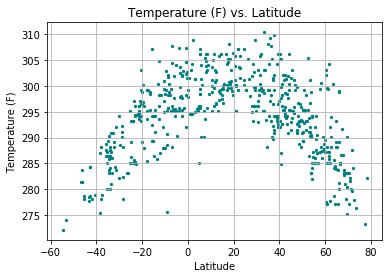

In [32]:
# Build a scatter plot for each data type
weather_df.plot(kind="scatter", x="Lat", y="Max Temp", color="teal", marker=".")

# Incorporate the other graph properties
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Data/PNG.Temp_vs_Lat.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

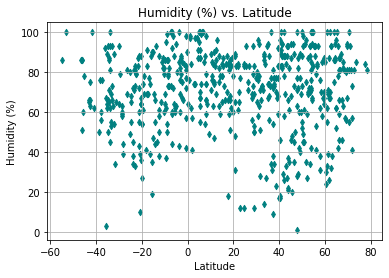

In [33]:
# Build a scatter plot for each data type
weather_df.plot(kind="scatter", x="Lat", y="Humidity", color="teal", marker="d")

# Incorporate the other graph properties
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Data/PNG.Humidity_vs_Lat.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

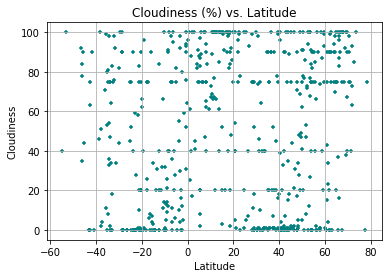

In [34]:
# Build a scatter plot for each data type
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", color="teal", marker="+")

# Incorporate the other graph properties
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Data/PNG.Cloudiness_vs_Lat.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

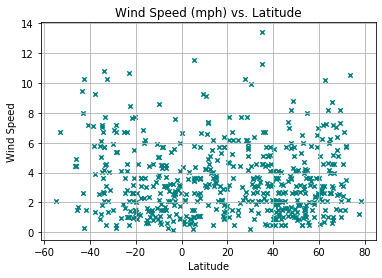

In [35]:

# Build a scatter plot for each data type
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", color="teal", marker="x")

# Incorporate the other graph properties
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Data/PNG.WindSpeed_vs_Lat.png")

# Show plot
plt.show()

## Linear Regression

Run linear regression on each relationship, only this time separate them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [50]:
# OPTIONAL: Create a function to create Linear Regression plots
# OPTIONAL: Create a function to create Linear Regression plots
def regress_func(x_vals, y_vals):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_vals,y_vals)
    plt.plot(x_vals,regress_values,"r-")
    return line_eq, rvalue

In [51]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df[weather_df["Lat"] > 0]
south_df = weather_df[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


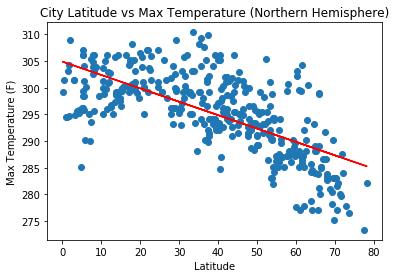

In [77]:
line_eq, rvalue = regress_func(north_df["Lat"], north_df["Max Temp"])

plt.title(f"City Latitude vs Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#plt.annotate(line_eq,(0,32),fontsize=15,color="red")
#plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(0,20),fontsize=15,color="red")
plt.savefig("Output_Data/PNG.MaxTemp_vs_Lat-NorthernHemisphere.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

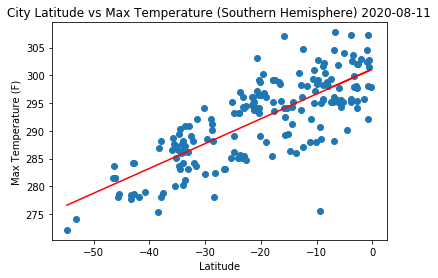

In [88]:
line_eq, rvalue = regress_func(south_df["Lat"], south_df["Max Temp"])

plt.title(f"City Latitude vs Max Temperature (Southern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
#plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(-55,88),fontsize=15,color="red")
plt.savefig("Output_Data/PNG.MaxTempvsLat-SouthernHemisphere.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

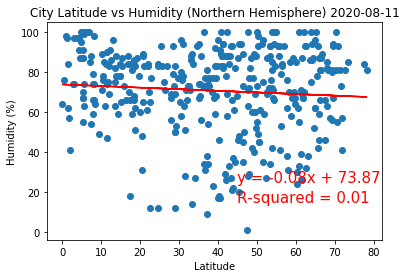

In [89]:
line_eq, rvalue = regress_func(north_df["Lat"], north_df["Humidity"])

plt.title(f"City Latitude vs Humidity (Northern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(45,15),fontsize=15,color="red")
plt.savefig("Output_Data/PNG.LatvsHumidity-NorthernHemisphere.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

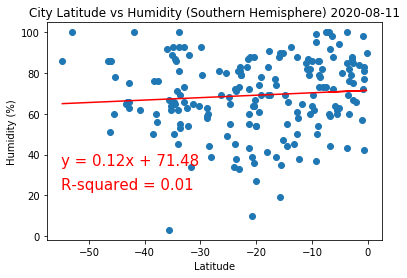

In [90]:
line_eq, rvalue = regress_func(south_df["Lat"], south_df["Humidity"])

plt.title(f"City Latitude vs Humidity (Southern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(-55,23),fontsize=15,color="red")
plt.savefig("Output_Data/PNG.LatvsHumidity-SouthernHemisphere.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

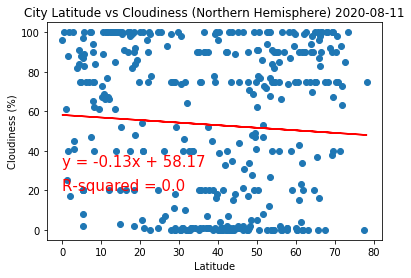

In [91]:

line_eq, rvalue = regress_func(north_df["Lat"], north_df["Cloudiness"])

plt.title(f"City Latitude vs Cloudiness (Northern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(0,32),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(0,20),fontsize=15,color="red")
plt.savefig("Output_Data/PNG.LatvsCloudiness-NorthernHemisphere.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

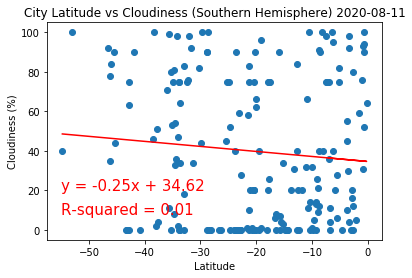

In [92]:
line_eq, rvalue = regress_func(south_df["Lat"], south_df["Cloudiness"])

plt.title(f"City Latitude vs Cloudiness (Southern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(-55,8),fontsize=15,color="red")
plt.savefig("Output_Data/PNG.LatvsCloudiness-SouthernHemisphere.png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

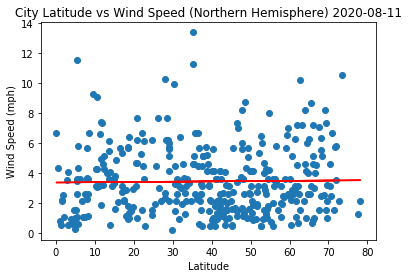

In [103]:

line_eq, rvalue = regress_func(north_df["Lat"], north_df["Wind Speed"])

plt.title(f"City Latitude vs Wind Speed (Northern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.annotate(line_eq,(0,32),fontsize=15,color="red")
#plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(0,28),fontsize=15,color="red")
plt.savefig("Output_Data/PNG.LatvsWindSpeed-NorthernHemisphere.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

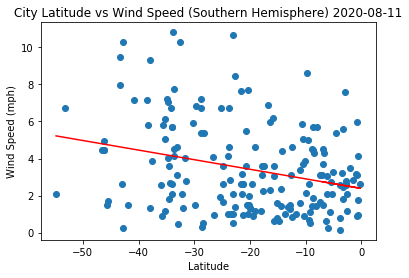

In [106]:

line_eq, rvalue = regress_func(south_df["Lat"], south_df["Wind Speed"])

plt.title(f"City Latitude vs Wind Speed (Southern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
#plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(-55,16),fontsize=15,color="red")
plt.savefig("Output_Data/PNG.LatvsWindSpeed-SouthernHemisphere.png")
plt.show()